## A Hands-on Introduction to Data Manipulation using Pandas  

### Meet the Instructor:
Aashita Kesarwani  
Current job: Scientific Computing Specialist at Harvey Mudd College  
Background:  
- PhD in Mathematics from Tulane University (Number Theory)
- Undergraduate from IIT (Indian Institute of Technology) in Applied Mathematics   

Other roles: 
- Visiting AI Researcher at [deepkapha.ai](https://www.linkedin.com/company/digitalis-kapha-b-v-/)
- Technical Reviewer, Deep Learning for Natural Language Processing course by [Packt](https://www.packtpub.com/)
- [Open source contributor](https://pypi.org/user/Aashita/)

### Today's session

- Introduction to Jupyter notebook  
- Introduction to pandas 
- Exercise session for data manipulation using pandas 
- A 10-min break around 5:10 pm
- Resumed exercise session for data manipulation using pandas 
- Machine Learning theory: Decision Trees and Random Forest
- Introduction to scikit-learn
- Another 10-min break around 6:20 pm
- Small in-class project for predicting election results using Decision Trees/Random Forest

Today's session is based on learn-by-doing approach, so you will be spending most of the time working with datasets.
    
#### Topics to be covered in `pandas`:  
- Pandas dataframes as the data structure for datasets
- Slicing and indexing dataframes using conditionals as well as iloc and loc methods.
- Statistical summary and exploration of dataframes
- Basic plots such as bar graph, piechart, etc.
- Basic operations such as dropping rows/columns, setting index, replacing values of a column using a dictionary, etc
- Regular expressions for data extraction
- Feature engineering such as creating new features 
- Correlation among features

We will explore the [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic). The dataset is provided as part of the beginner level competition with the goal: To apply the tools of machine learning to predict which passengers survived the Titanic tragedy. 

We will keep using this dataset for learning and demonstration of the relevant tools and concepts. The exercises is carefully designed to let you apply what you learn here in your in-class project at the end which involves using data from [ANES (American National Election Study)](https://electionstudies.org/data-center/) to build prediction models.

First let us start with the Jupyter Notebook. 

It is composed of blocks that are called cells.

There are two types of cells:
* Code cells
* Markdown cells (for text)

You can change the cell type by clicking on the Cell Tab located at the header of the notebook and then selecting Cell Type and choosing the type of cells.

You run a cell using `Enter` + `Shift`.

Press `Esc` to activate the command mode:
Shortcuts:
* A: Insert cell above
* B: Insert cell below
* C: Copy 
* V: Paste 
* X: Cut 
* DD: Delete 
* M: Convert to Markdown cell
* Shift: Let's you select multiple cells at once that you can copy/cut/delete.

First we import the relevant python modules:

In [1]:
import numpy as np
import pandas as pd

# The following two modules matplotlib and seaborn are for plots
import matplotlib.pyplot as plt
import seaborn as sns # Comment this if seaborn is not installed
%matplotlib inline

# The module re is for regular expressions
import re

Pandas: an excellent tool to work with datasets

Dataframes: the central data structure of pandas library
- Evolved out of tables
- Most suitable for data manipulation tasks  

Pandas is built on top of numpy. The crucial difference between numpy matrices and pandas Dataframes is that the columns in a Dataframe can be of different datatypes such as numerical, categorical, textual, etc.

First we load the [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic) stored in the `csv` file as a dataframe using [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

In [2]:
path = 'data/'
df = pd.read_csv(path + 'titanic.csv')

In [3]:
df

As it turns out to be rather big dataset to display, we can comment the above cell by adding # in front of df and run it again to get rid of the output.

Next, let's check the numbers of rows and columns in the dataset.

In [4]:
df.shape

(891, 12)

So, the dataset consists of 891 rows and 15 columns.

We use `head()` function to peek into the first 5 rows (or any number of rows by using `head(n)`).

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[Description for the columns](https://www.kaggle.com/c/titanic/data) is as follows.  

|Variable|	Definition|	Key|   
|:---  |:--- |:---|
|PassengerId| Passenger ID |
|Survived| 	Survival|	0 = No, 1 = Yes |
|Pclass	|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex	|Sex|	
|Age	|Age in years	|
|SibSp	|# of siblings / spouses aboard the Titanic	|
|Parch	|# of parents / children aboard the Titanic	|
|Ticket	|Ticket number	|
|Fare	|Passenger fare	|
|Cabin	|Cabin number	|
|Embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

* What do we mean by *features* in machine learning?

The final goal of the competition in Kaggle is to design a model to predict whether a passenger survives or not.

* Can this be a classification task?
* Which of the above features seem like important predictors? 

### 1. Selecting rows and columns from the dataframe

How do we select a column from the dataframe? Say, we want to select the *Name* column from the dataframe. 

Remember, we used square brackets for indexing lists, strings and numpy arrays in Python, for example `A[0]`.

In [6]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Since we do not want all the rows in the output, we have used `head()` function at the end.

How do we select multiple columns? Suppose we want to select the columns *Name, Sex* and *Age* from the dataframe. Hint: Use a list of columns inside the square brackets.

We can also select rows by putting a certain condition on a column. Say, we want only those rows for which the gender is *'female'*. 

In [7]:
df[df["Sex"] == "female"].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Now, we want to retrieve only the female passengers traveling in the first class. 
Hint: Add another conditional `df['Pclass']==1` to the above code using & and make sure to wrap the two conditionals with parenthesis.

We can also get the number of passengers using the shape method which gives us both the number of columns and the number of rows. Write the code to count the number of female passengers in the traveling in the first class. 

#### The `loc` and `iloc` methods
So far, we have seen how to retrieve either some select columns or certain rows based on conditionals. What if we want to slice off a portion of the dataframe with some specific rows and columns? We use `.loc[]` or `.iloc[]` methods for this purpose. 
* `.iloc[]` method is primarily integer position based and gets rows/columns at particular positions in the index (so it only takes integers). 
* `loc[]` method is label based and gets rows/columns with particular labels from the index.

The `loc[]` method allows us to put conditions on rows and retrieve select columns simultaneously.

For example, we want to get the name and the survival information for all the adults above 70 years.

In [8]:
df.loc[df['Age']>70, ['Name', 'Survived']]

,Name,Survived
96,"Goldschmidt, Mr. George B",0
116,"Connors, Mr. Patrick",0
493,"Artagaveytia, Mr. Ramon",0
630,"Barkworth, Mr. Algernon Henry Wilson",1
851,"Svensson, Mr. Johan",0


Write the code to retrieve the **name, age and survival** information for all the **female passengers traveling in the first class**. 

The `iloc[]` method let us retrieve rows by passing sequence of indexes. For example, we can select the rows numbered 100th to 105th. The indexing works exactly like python lists and numpy arrays.

In [9]:
df.iloc[100:106]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S


Write the code to retrieve every 100th row from the dataframe.

## Instructions for the exercise sections:
- There are two exercise sections (section 2 and 3) below, each of them are alloted 30 minutes.
- The exercise involves new concepts not covered in the guided session. Please feel free to ask questions and take help from the instructor.
- The hints are provided for the exercises below. The built-in functions to be used are provided with a clickable link to the user manual. 
- The exercise session is time-bound and you are encouraged to work in groups to speed things up! If you do not finish the section 2 in 40 minutes, please skip the remaining exercises to jump on to section 3.

### 2. Exploring the dataset (30 min)

Use [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function for numerical features (columns) to get a brief overview of the statistics of the data.

Do the same as above for qualitative (non-numerical) features. Hint: Use `include=['O']` parameter in the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function.

 Use the built-in pandas function to count the number of surviving and non-surviving passengers. Hint: Use [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) on the column `df['Survived']`.

Below is a pie chart of the same using `matplotlib`:

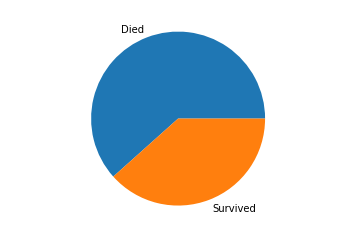

In [10]:
plt.axis('equal') 
plt.pie(df['Survived'].value_counts(), labels=('Died', "Survived"));

Below is a bar chart for the survival rate among male and female passengers using `seaborn`. Here is [Seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf).

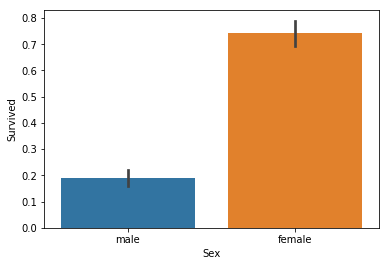

In [11]:
sns.barplot(x = 'Sex', y = 'Survived', data = df);

Plot the survival rate among passengers in each ticket class.

We can also check the survival rate among both genders within the three ticket classes as follows.

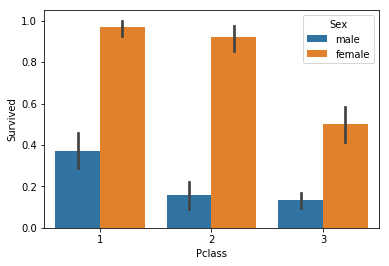

In [12]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df);

From the above chart, do you think that the gender affect the chance of survival for all the three ticket classes equally? Or does it seem like gender's effect is more pronounced for a certain ticket class passengers than others? We plot the  point estimates and confidence intervals for each sub-category to see it more clearly.

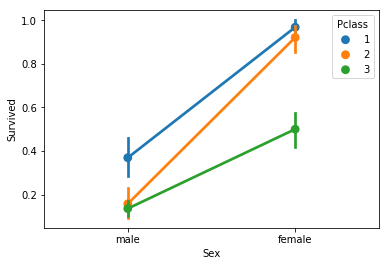

In [13]:
sns.pointplot(x='Sex', y='Survived', hue='Pclass', data=df);

Notice the steeper slope for the second class.

It seems that gender and ticket class put together give more information about the survival chance than both of them separately. Please feel free to later explore other variables and combination of variables in depth in your own time.

How many children were on board? Hint: Use indexing on rows using conditional on the *Age* column and then the [`shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) method to count the rows as seen above.

How many of the children on board survived? Hint: Add another conditional for the *Survived* column to the above code.

### 3. Using regular expressions for data extraction (30 min)

Now, we are going to create a new feature (column) for titles of the passengers. For that, let us first take at the passengers' names. 

In [16]:
df.loc[:20, 'Name'].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J'], dtype=object)

We notice one of the identifying characteristics of the titles above are that they end with a period. Regular expressions are very useful in the process of data extraction and we will use them using the python module `re` to extract the titles from the *Name* column. We will use regular expressions characters to construct a pattern and then use built-in function `findall` for pattern matching.

Some useful regular expression characters:
- `\w`: pattern must contain a word character, such as letters.
- `[ ]`: pattern must contain one of the characters inside the square brackets. If there is only one character inside the square brackets, for example `[.]`, then the pattern must contain it.

Let's try this.

In [17]:
re.findall("\w\w[.]", 'Braund, Mr. Owen Harris')

['Mr.']

It worked! It returned a list instead of the string, so we use indexing to get the first element of the list.

In [18]:
re.findall("\w\w[.]", 'Braund, Mr. Owen Harris')[0]

'Mr.'

Let us try it on another name:

In [19]:
re.findall("\w\w[.]", 'Heikkinen, Miss. Laina')[0]

'ss.'

So, we want a pattern that automatically detects the length of the title and returns the entire title.

For regular expressions, \+ is added to a character/pattern to denote it is present one or more times. For example, `\w+` is used to denote one or more word characters. Fill in the regular expression in the below cell that will detect a period preceeded by one or more word characters.

In [20]:
# Fill in below:
re.findall("FILL IN HERE", 'Heikkinen, Miss. Laina')[0]

IndexError: list index out of range

The output should be `'Miss.'`

Summary: For pattern matching the titles using regular expressions:
- First we make sure it contains a period by using `[.]`. 
- Secondly, the period must be preceeded by word characters (one or more), so we use `\w+[.]`.

Write a function `get_title` that takes a name, extracts the title from it and returns the title.

Check that the function is working properly by running the following two cells.

In [ ]:
get_title('Futrelle, Mrs. Jacques Heath (Lily May Peel)')

The output should be `'Mrs.'`. Note: Make sure that the funtion returns a string and not a list. Please modify the above function accordingly.

In [ ]:
get_title('Simonius-Blumer, Col. Oberst Alfons')

The output should be `'Col.'`.

Create a new column named Title and extract titles from the Name column using the above function `get_title`. Hint: Use built-in [`map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function. The syntax is `df['New_column'] = df['Relevant_column'].map(function_name)`.

Let us peek into the dataframe.

In [ ]:
df.head()

List all the unique values for the titles along with their frequency. Hint: Use an inbuilt pandas function

Now, we want to replace the various spellings of the same title to a single one. Hint: Use the below dictionary with the [`replace`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html) function

`title_dictionary = {'Ms.': 'Miss.', 'Mlle.': 'Miss.', 
              'Dr.': 'Rare', 'Mme.': 'Mr.', 
              'Major.': 'Rare', 'Lady.': 'Rare', 
              'Sir.': 'Rare', 'Col.': 'Rare', 
              'Capt.': 'Rare', 'Countess.': 'Rare', 
              'Jonkheer.': 'Rare', 'Dona.': 'Rare', 
              'Don.': 'Rare', 'Rev.': 'Rare'}`

List all the unique values for the titles along with their frequency to check that the titles are replaced properly.

### 4. Correlation between variables

What are the possible ways to understand the correlation of features with survival? Does correlation always implies causation?

Pearson correlation coefficients measures the linear correlation between the variables.

$$\rho_{X,Y} = \frac{cov(X, Y)}{\sigma_X, \sigma_Y}$$
where 
- $cov(X, Y)$ is the covariance.    
- $\sigma_X, \sigma_Y$ are standard deviations of $X$ and $Y$ respectively.

The correlation between two variables ranges from -1 to 1. The closer in absolute value a correlation is to 1, the more dependent two features are each other.

We can get the correlation matrix for the variables (columns) in the dataset using the built-in function `corr()`.

In [ ]:
df.corr()

* From the above matrix, note which feature has the highest correlation with the survival. 
* Do features have high correlation among themselves? 
* Note that this matrix has excluded some categorical variables like gender, port of embarkment, etc. 

The correlation matrix can also be visualized using heatmaps as shown below.

In [ ]:
correlation_matrix = df.corr();
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix);

### 5. Detecting and filling missing values (Optional homework exercise):

Use the functions [`isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) and [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) functions (piped one after the other) on the dataframe to find out the number of missing values in each column.

Detecting missing values is an important first step in Feature Engineering, that is preparing the features (independent variables) to use for building the machine learning models. The next step is to handle those missing values. Depending on the data, sometimes it is a good idea to drop the rows or columns that have some or a lot of missing values, but that also means discarding relevant information. Another way to handle missing values is to fill them with something appropriate. 

1. Discuss the pros and cons of dropping the rows and/or columns with missing values in general. Should you drop none, all or some of the columns for this particular dataset in view of building the predictive model? Same question for dropping the rows with missing values.
3. If you consider filling the missing values, what are the possible options? Can you make use of other values in that column to fill the missing values? Can you make use of other values in that row as well as values in that column to fill the missing values 
4. Can the title in the name column be used for guessing a passengers' age based on the age values of other passengers with the same title?

What is the most common port of embarkment? Hint: Check the frequency (counts) of each value in the Embarked column using the built-in function [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) as seen above. 

As we saw above, there are missing values in the column for *Embarked*. Fill them with the most commonly occuring value. Hint: Use [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html).

Let us check whether the missing values for the *Embarked* column is indeed filled.

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

If not, there are two options to fix this. One is to set `inplace` parameter in the `fillna()` function as `True` and another is to use assignment operator `=` as in `df = df.function()`. 

***Question***: Why is the `inplace` keyword False by default? This is true not just for `fillna()` but for most built-in functions in pandas. 

Answer: To facilitate method chaining or piping i.e. invoking multiple operations one after the other. For example, `df.isnull().sum()` used above. Chaining is more commonly used in pandas as compared to another programming style i.e. using nested function calls. Please read more [here](https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69), if interested.

We should remove the *Cabin* column from the DataFrame-- too many values are missing. Hint: Use [`drop()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) with appropriate value for the `axis` keyword. 

Let us check whether the column is indeed dropped. If not, modify the code above accordingly.

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What is the median age of passengers? Hint: Use the inbuilt function [`median`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html).

What is the median age of passengers with the title 'Miss.'? Hint: Use [`loc[]`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) method for slicing off the select rows and the *Age* column.

What is the median age of passengers with the title 'Mrs.'?

Is there a noticeble difference in the median ages for the passengers with the above two titles? Should we take titles into account while filling the missing values for the *Age* column? If yes, how?

This is the end of the exercise session and the following code is part of the guided session. If you finished this and the above section earlier than the alloted time, please skip the following two sections for now to go directly to the [section 7](#section7) on merging dataframes.

#### Acknowledgment:
* [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic) dataset openly available in Kaggle is used in the exercises.

**Note:**
The solutions for this exercise can be found [here]().